# 2. 신생아 수 및 합계출산율

합계 출산율 = 한 여자가 가임기간(15~49세)에 낳을 것으로 기대되는 평균 출생아 수

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 사용 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'   # Windows에서 한글 사용
matplotlib.rcParams['font.size'] = 15                  # 한글 글자 크기 설정
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
file_name = 'stat_142801.xls'

df = pd.read_excel(file_name, skiprows=2, nrows=2, index_col=0)
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [3]:
# 출생아 수 행 데이터를 가져오려고 하는데, 에러가 발생함 -> 이 경우, 인덱스 이름에 유니코드가 숨어있지는 않은지 파악이 필요
df.loc['출생아 수']

KeyError: '출생아 수'

In [4]:
# df.index만 입력해서는 앞에서 작성한 코드 df['출생아 수']가 왜 실행이 되지 않았는지 이유를 찾을 수 없음.
df.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [5]:
# df.index.values를 입력하면, 겉으로는 안보였던 유니코드가 보이게 되고, '\xa0'과 같은 코드로 인해  df['출생아 수']가 에러뜬 것!
df.index.values

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [7]:
# rename을 통해서 인덱스의 내용을 바꿔주는 작업이 필요!
df.rename(index={'출생아\xa0수':'출생아 수', '합계\xa0출산율':'합계 출산율'}, inplace=True)
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [8]:
# 이제 인덱스 이름으로, 행 전체의 데이터를 가져오는 것이 가능해짐!
df.loc['출생아 수']

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [9]:
# 사실, loc를 통해 인덱스 이름으로 접근이 어려우면
# iloc를 통해 인덱스 번호로 접근해서 행 전체의 데이터를 '한 줄로' 쉽게 불러올 수 있긴 하다!
df.iloc[0]

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [10]:
# DataFrame Transpose 시키기 - Plotting하기 쉽도록, 행과 열을 뒤 바꿔준 것!
df = df.T
df

,출생아 수,합계 출산율
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.840


***

### 그래프 그리기 [데이터 시각화]

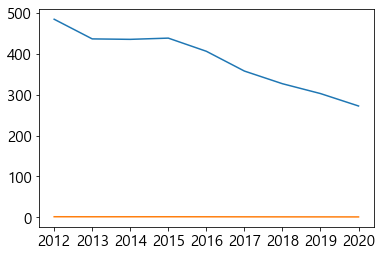

In [11]:
# 두 데이터간 값 차이가 커서 데이터를 정확히 분석, 비교가 어려움.
# 이 경우, 각각의 데이터에 대해 각각 새로운 y축 범주를 지정하면 된다.
plt.plot(df.index, df['출생아 수'])
plt.plot(df.index, df['합계 출산율'])

plt.show()

In [ ]:
fig, axs_1 = plt.subplots(figsize=(10,7))
axs_1.plot(df.index, df['출생아 수'], color='#ff812d')

axs_2 = axs_1.twinx()                     # x축을 공유하는 쌍둥이 axis
axs_2.plot(df.index, df['합계 출산율'], color='#ffd100')

plt.show()

In [ ]:
fig, axs_1 = plt.subplots(figsize=(13,5))
fig.suptitle('출생아 수 및 합계출산율')

axs_1.bar(df.index, df['출생아 수'], color='#ff812d')
axs_1.set_ylabel('출생아 수(천 명)')
axs_1.set_ylim(250,700)
axs_1.set_yticks([300,400,500,600])

for idx, val in enumerate(df['출생아 수']):
    axs_1.text(idx, val+12, val, ha='center')


axs_2 = axs_1.twinx()                     # x축을 공유하는 쌍둥이 axis
axs_2.plot(df.index,df['합계 출산율'],color='#ffd100',marker='o',markersize=10,markeredgecolor='w',markeredgewidth=3,linewidth=3)
axs_2.set_ylabel('합계 출산율(가임여성 1명당 명)')
axs_2.set_ylim(0,1.5)
axs_2.set_yticks([0,1])

for idx, val in enumerate(df['합계 출산율']):
    axs_2.text(idx, val+0.08, val, ha='center')

plt.show()